# Dragon Real Estate - Price Predictor

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("data.csv")

In [4]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,CHAS,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,0,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,0,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,0,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,0,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,0,43.1


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   CHAS                                    414 non-null    int64  
 8   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
housing['CHAS'].value_counts()

CHAS
0    295
1    119
Name: count, dtype: int64

In [7]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,CHAS,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.732367,1083.885689,4.094203,24.969030,121.534798,0.287440,37.980193
std,119.655756,0.281967,11.367000,1262.109595,2.945562,0.012410,0.032029,0.453116,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.253400,0.000000,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,0.000000,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538675,0.000000,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543480,1.000000,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.856600,1.000000,117.500000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
housing.hist(bins=50, figsize=(20,15)) 

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'Y house price of unit area'}>]],
      dtype=object)

In [11]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

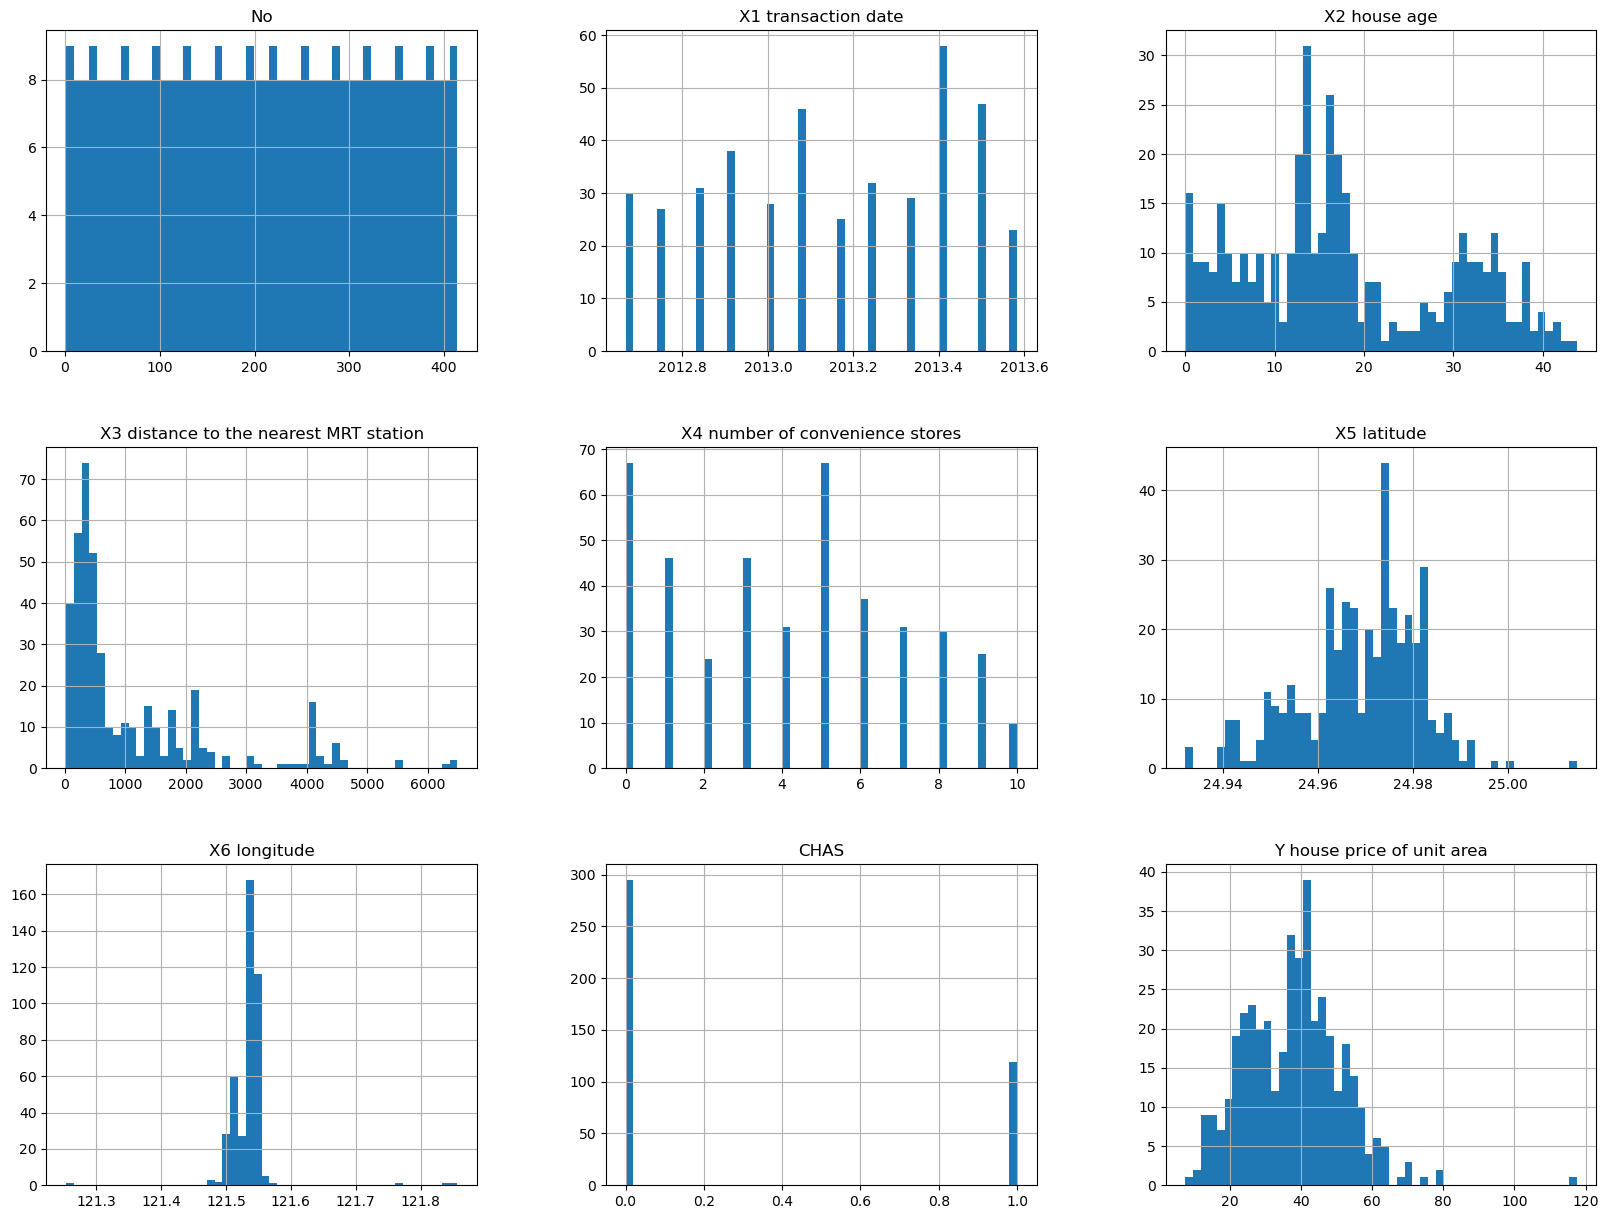

In [12]:
plt.show(close=None, block=None)

## Train Test Splitting 

In [14]:
import numpy as np
np.random.seed(42)

In [15]:
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)

In [17]:
print(f"Rows in train set: {len(train_set)}")

Rows in train set: 332


In [18]:
print(f"Rows in train set: {len(test_set)}")

Rows in train set: 82


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,CHAS,Y house price of unit area
151,152,2013.500,4.9,387.77210,9,24.98118,121.53788,0,44.7
283,284,2013.417,33.5,1978.67100,2,24.98674,121.51844,0,23.5
250,251,2013.167,39.2,424.71320,7,24.97429,121.53917,0,30.0
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,0,52.5
315,316,2013.083,15.6,1756.41100,2,24.98320,121.51812,0,27.3
...,...,...,...,...,...,...,...,...,...
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,0,54.8
20,21,2013.417,4.5,2275.87700,3,24.96314,121.51151,0,29.3
252,253,2012.833,5.9,90.45606,9,24.97433,121.54310,0,52.7
229,230,2013.583,31.0,1156.41200,0,24.94890,121.53095,0,19.0


In [21]:
strat_test_set['CHAS'].value_counts()

CHAS
0    59
1    24
Name: count, dtype: int64

In [22]:
strat_train_set['CHAS'].value_counts()

CHAS
0    236
1     95
Name: count, dtype: int64

In [23]:
59/24

2.4583333333333335

In [24]:
236/95

2.4842105263157896

In [25]:
housing = strat_train_set.copy()

## Looking for Correlations

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix['X5 latitude'].sort_values(ascending=False)

X5 latitude                               1.000000
Y house price of unit area                0.490410
X4 number of convenience stores           0.396520
X2 house age                              0.078258
X1 transaction date                       0.038338
X6 longitude                              0.025733
No                                       -0.002531
CHAS                                     -0.006076
X3 distance to the nearest MRT station   -0.524922
Name: X5 latitude, dtype: float64

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["X4 number of convenience stores", "X5 latitude", "X2 house age", "X6 longitude"]
scatter_matrix(housing[attributes], figsize = (12, 8))

array([[<Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X5 latitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X6 longitude', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='X4 number of convenience stores', ylabel='X5 latitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X5 latitude'>,
        <Axes: xlabel='X2 house age', ylabel='X5 latitude'>,
        <Axes: xlabel='X6 longitude', ylabel='X5 latitude'>],
       [<Axes: xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <Axes: xlabel='X5 latitude', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X6 longitude', ylabel='X2 house age'>],
       [<Axes: xlabel='X4 number of convenience stores', ylabel='X6 longitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X

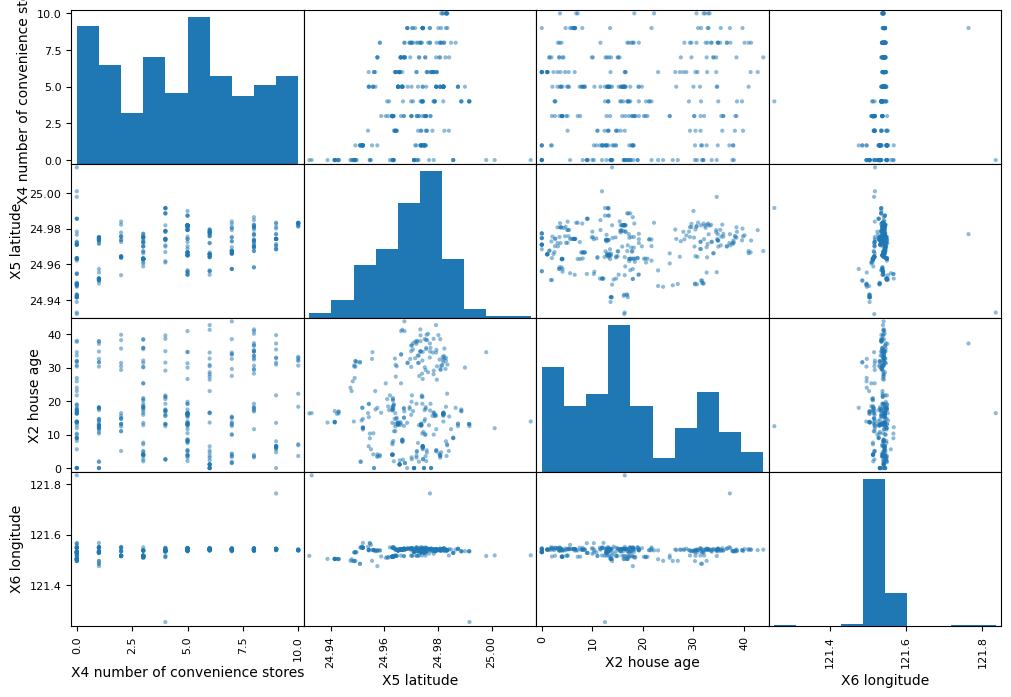

In [30]:
plt.show(close=None, block=None)

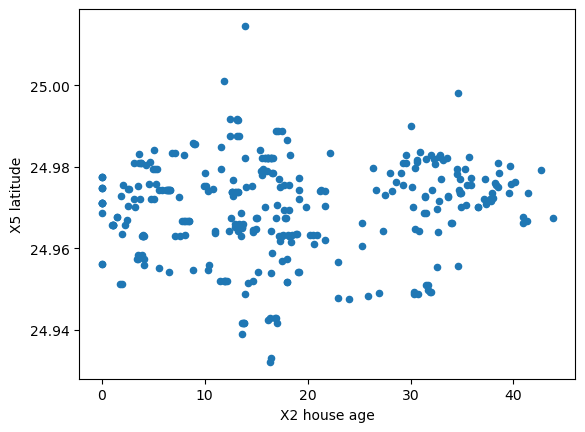

In [31]:
housing.plot(kind="scatter", x="X2 house age", y="X5 latitude")
plt.show(close=None, block=None)

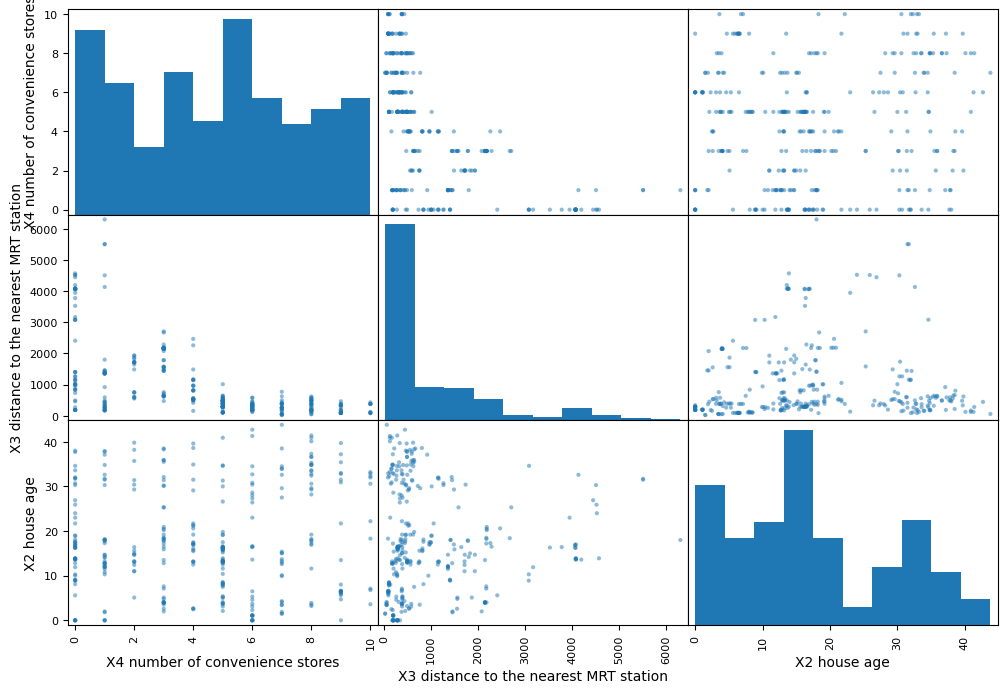

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["X4 number of convenience stores", "X3 distance to the nearest MRT station", "X2 house age"]
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show(close=None, block=None)

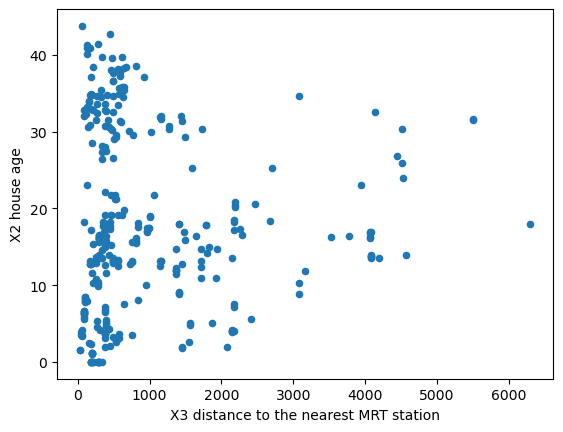

In [33]:
housing.plot(kind="scatter", x="X3 distance to the nearest MRT station", y="X2 house age")
plt.show(close=None, block=None)

## Trying out Attribute Combination

In [35]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,CHAS,Y house price of unit area
172,173,2013.583,6.6,90.45606,9,24.97433,121.54310,0,58.1
279,280,2013.417,2.6,1554.25000,3,24.97026,121.51642,0,31.1
35,36,2013.500,13.9,4079.41800,0,25.01459,121.51816,1,27.3
125,126,2013.167,1.1,193.58450,6,24.96571,121.54089,0,48.6
95,96,2012.917,8.0,104.81010,5,24.96674,121.54067,0,51.8


In [36]:
housing["Price per Year"] = housing['Y house price of unit area']/housing['X2 house age']

In [37]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,CHAS,Y house price of unit area,Price per Year
172,173,2013.583,6.6,90.45606,9,24.97433,121.54310,0,58.1,8.803030
279,280,2013.417,2.6,1554.25000,3,24.97026,121.51642,0,31.1,11.961538
35,36,2013.500,13.9,4079.41800,0,25.01459,121.51816,1,27.3,1.964029
125,126,2013.167,1.1,193.58450,6,24.96571,121.54089,0,48.6,44.181818
95,96,2012.917,8.0,104.81010,5,24.96674,121.54067,0,51.8,6.475000


In [38]:
corr_matrix = housing.corr()
corr_matrix['X5 latitude'].sort_values(ascending=False)

X5 latitude                               1.000000
Y house price of unit area                0.490410
X4 number of convenience stores           0.396520
X2 house age                              0.078258
X1 transaction date                       0.038338
X6 longitude                              0.025733
Price per Year                            0.017381
No                                       -0.002531
CHAS                                     -0.006076
X3 distance to the nearest MRT station   -0.524922
Name: X5 latitude, dtype: float64

In [39]:
corr_matrix['X2 house age'].sort_values(ascending=False)

X2 house age                              1.000000
X5 latitude                               0.078258
X4 number of convenience stores           0.075634
CHAS                                      0.051555
X6 longitude                              0.033087
X3 distance to the nearest MRT station    0.017290
X1 transaction date                       0.017127
No                                       -0.006617
Y house price of unit area               -0.183949
Price per Year                           -0.577156
Name: X2 house age, dtype: float64

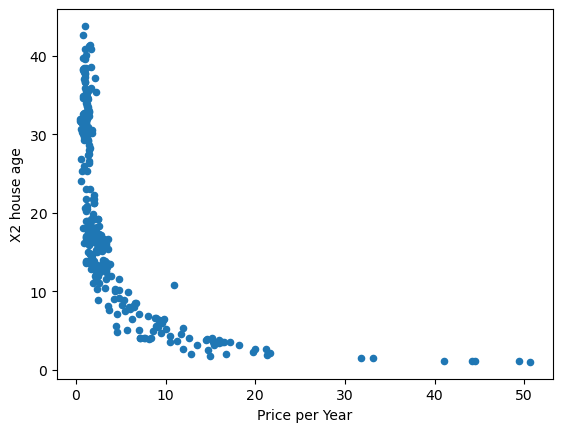

In [40]:
housing.plot(kind="scatter", x="Price per Year", y="X2 house age")
plt.show(close=None, block=None)

## Missing Attributes

As you can see in the below data, the X6 longitude attrbute has some missing attributes.

To take care of missing attributes, you have three options:
    1. Get rid of missing data points.
    2. Get rid of the whole attribute
    3. Set the value to either of the given values (0, mean or median)

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 172 to 335
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      331 non-null    int64  
 1   X1 transaction date                     331 non-null    float64
 2   X2 house age                            331 non-null    float64
 3   X3 distance to the nearest MRT station  331 non-null    float64
 4   X4 number of convenience stores         331 non-null    int64  
 5   X5 latitude                             331 non-null    float64
 6   X6 longitude                            331 non-null    float64
 7   CHAS                                    331 non-null    int64  
 8   Y house price of unit area              331 non-null    float64
 9   Price per Year                          331 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 28.4 KB


Option one, i.e We get rid of the missing data points.

In [45]:
a = housing.dropna(subset=["X6 longitude"])
a.shape
#Note that the origital housing dataframe remains unchanged

(331, 10)

As visible, the full dataframe has the 10 attributes which it has previously, however,now it only has 409 tuples or rows, which priviously were 414.

Now we try Option two, Getting rid of the whole attribute

In [48]:
housing.drop("X6 longitude", axis=1)
#Note that the origital housing dataframe remains unchanged

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,CHAS,Y house price of unit area,Price per Year
172,173,2013.583,6.6,90.45606,9,24.97433,0,58.1,8.803030
279,280,2013.417,2.6,1554.25000,3,24.97026,0,31.1,11.961538
35,36,2013.500,13.9,4079.41800,0,25.01459,1,27.3,1.964029
125,126,2013.167,1.1,193.58450,6,24.96571,0,48.6,44.181818
95,96,2012.917,8.0,104.81010,5,24.96674,0,51.8,6.475000
...,...,...,...,...,...,...,...,...,...
297,298,2012.833,34.9,567.03490,4,24.97003,0,28.5,0.816619
321,322,2012.917,16.9,964.74960,4,24.98872,0,37.7,2.230769
244,245,2013.083,4.8,1559.82700,3,24.97213,0,21.7,4.520833
259,260,2013.083,8.1,837.72330,0,24.96334,0,28.8,3.555556


Notice how the number of columns have reduced. Previously there were 10 now there are only 9 attributes. That is because now we have housing["X6 longitude"].fillna(median)droppr the attribute X6 longitude. This can also be seen clearly above.

Now we explore option three, i.e. taking mean, median or 0.

In [51]:
median = housing["X6 longitude"].median()
housing["X6 longitude"] = housing["X6 longitude"].fillna(median)
#Computed median for option 3
#Note that the origital housing dataframe remains unchanged

In [52]:
#Learn how to use Imputer, its showing error because the dataset has NaN

## SciKit-Learn Design

Primarily, There are three types of objects.
1. Estimators - It estimates the value of some parameter based on a dataset. Eg. Imputer
2. Transformer - Takesinput and returns output based on the learnings from fit().
3. Predictors - Linear Regression Model is an example.

## Feature Scaling

Primarily, There are two types of scaling methods:
1. Normalization - {Min-Max Scaling}  = (value-min)/(max-min)
   [Sklearn provides a class called MinMaxScaler for this]
2. Standardization = (value-mean)/Standard Deviation
   [Sklearn provides a class called Standard Scaler for this]

## Creating Pipeline

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [59]:
#housing_pipe = my_pipeline.fit_transform(housing)


## Selecting a desired model for Dragon Real Estate

In [61]:
housing = strat_train_set.drop("Y house price of unit area", axis=1)
housing_labels = strat_train_set["Y house price of unit area"].copy()

In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 172 to 335
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      331 non-null    int64  
 1   X1 transaction date                     331 non-null    float64
 2   X2 house age                            331 non-null    float64
 3   X3 distance to the nearest MRT station  331 non-null    float64
 4   X4 number of convenience stores         331 non-null    int64  
 5   X5 latitude                             331 non-null    float64
 6   X6 longitude                            331 non-null    float64
 7   CHAS                                    331 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 23.3 KB


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model_2 = DecisionTreeRegressor()
model = LinearRegression()
model_3 = RandomForestRegressor()
model.fit(housing, housing_labels)
model_2.fit(housing, housing_labels)
model_3.fit(housing, housing_labels)

RandomForestRegressor()

In [64]:
some_data = housing.iloc[:5]

In [65]:
some_labels = housing_labels.iloc[:5]

In [66]:
model.predict(some_data)

array([54.1286159 , 38.94590209, 37.56379047, 47.48298349, 44.00992715])

In [67]:
model_2.predict(some_data)

array([58.1, 31.1, 27.3, 48.6, 51.8])

In [68]:
model_3.predict(some_data)

array([59.2  , 29.987, 34.847, 49.243, 52.215])

In [69]:
list(some_labels)

[58.1, 31.1, 27.3, 48.6, 51.8]

## Evaluating The Model

In [71]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [72]:
lin_rmse

8.765816453638687

Below Overfitting has been done, i.e. The model understood the trend and the noise. We just want the model to unerstand the trend

In [74]:
housing_predictions = model_2.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [75]:
lin_rmse

0.0

In [76]:
housing_predictions = model_3.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [77]:
lin_rmse

2.8383997161500143

## Using Better evaluation technique - Cross Validation

In [79]:
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_2, housing, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [80]:
rmse_scores

array([ 5.65846581,  9.35618415,  6.56448202, 12.09422602,  9.75947092,
        6.92844379, 14.10820737,  8.38051492, 14.39965277, 10.0007121 ])

In [81]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standar Deviation: ", scores.std())

In [82]:
print_scores(rmse_scores)

Scores:  [ 5.65846581  9.35618415  6.56448202 12.09422602  9.75947092  6.92844379
 14.10820737  8.38051492 14.39965277 10.0007121 ]
Mean:  9.725035986996229
Standar Deviation:  2.881757950291862


Now, Try the same thing for Linear Regression

In [84]:
scores = cross_val_score(model, housing, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [85]:
rmse_scores

array([ 7.27962662,  7.32897554,  6.19861711, 11.86083462,  8.14281976,
        9.34777865,  6.62149249,  7.46431193, 15.17828806,  7.33313191])

In [86]:
print_scores(rmse_scores)

Scores:  [ 7.27962662  7.32897554  6.19861711 11.86083462  8.14281976  9.34777865
  6.62149249  7.46431193 15.17828806  7.33313191]
Mean:  8.675587669414305
Standar Deviation:  2.6561764038518416


Linear Regression is doing a better

In [87]:
scores = cross_val_score(model_3, housing, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [88]:
rmse_scores

array([ 4.43991131,  5.78959653,  4.29754115,  9.60494545,  8.68545485,
        5.69003346,  7.24871751,  7.68811754, 14.69038918,  6.56065245])

In [89]:
print_scores(rmse_scores)

Scores:  [ 4.43991131  5.78959653  4.29754115  9.60494545  8.68545485  5.69003346
  7.24871751  7.68811754 14.69038918  6.56065245]
Mean:  7.469535942234458
Standar Deviation:  2.9039759604667554


By far the best model here is RandomForest Regressor

In [161]:
from joblib import dump, load
dump(model_3, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on the test data

In [167]:
X_test = strat_test_set.drop("Y house price of unit area", axis=1)
Y_test = strat_test_set["Y house price of unit area"].copy()
Final_Predication = model.predict(X_test)
Final_mse = mean_squared_error(Y_test, Final_Predication)
Final_rmse = np.sqrt(Final_mse)

In [169]:
Final_rmse

8.086451185365359

In [173]:
print(Final_Predication, list(Y_test))

[54.44981803 32.76572309 39.6426448  43.42271251 35.37301392 48.31462364
 10.4963366  12.36790869 27.61507048 22.89896026 15.33408032 42.9077515
 43.13089112 51.88378555 33.99381477 37.33721493 47.50760843 50.52131437
 14.93947594 40.14262929 36.75421513 42.38831668 43.46075563 13.2897054
 11.56197855 46.24054631 47.41188012 47.82762556 12.10727191 12.15949143
 34.32372446 46.07276773 32.87527506 39.0011091  71.42521692 10.165753
  9.9191239  38.49759804 50.28404181 48.29511235 37.43855001 32.84684361
 37.30207467 40.38599599 31.00709033 35.29003657 38.75271335 42.4234224
 47.13101124 26.03503102 37.31755081 52.29830863 24.83670253 41.52180748
 38.42551966 28.39155608 10.76174228 41.28402627 28.24771566 50.49742361
 34.01524882 33.89804583 43.62042503 47.36543009 10.01302463 45.59053693
 29.68092592 34.3464761  37.79829597 33.12284653 49.07485514 32.52614983
 32.8639383  -0.16713364 43.48523879 32.92707232 43.39123281 40.65306619
 49.89192089 34.32853093 50.07791227 26.56470382 13.6465